<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/5%20PCA/PCA_Algorithm_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA Algorithm and Implement from Scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import preprocessing

## Covariance Matrix

By wikipedia:

*A covariance matrix (also known as auto-covariance matrix, dispersion matrix, variance matrix, or variance–covariance matrix) is a square matrix giving the covariance between each pair of elements of a given random vector. Any covariance matrix is symmetric and positive semi-definite and its main diagonal contains variances (i.e., the covariance of each element with itself).*

Simply put, a covariance matrix:

*   is a square matrix.
*   its diagonal elements are the variances of all variables
*   its off-diagonal elements are the covariances between two variables.
*   it's symmetric matrix, meaning the elements in a row position is same in the column position.





### Variance

Variance is the measurement of variation of a single variable, for example the blood pressure in a group of people. The Variances appear in the diagonal of the covariance matrix.

It's defined as:

$\sigma(x) = \displaystyle\frac{1}{n}\sum_{i=1}^n(x_i-\bar{x})^2$

Where 

* $x$ is the variable, $x_i$ is the $i$-th element
* $n$ is the total number of data
* $\bar{x}$ is the mean of $x$, 
$\bar{x}=\displaystyle\frac{1}{n}\sum_{i=1}^n(x_i)$

### Covariance
The covariance is the measurement of variation of two variables and how they change together, for example how the blood pressure and the weight are changing together in a group of people.

The covariance can be positive, negative or zero. A positive covariance indicates that the two variables have a positive relationship, for example the blood pressure is increasing together with weight; a negative covariance shows that they have a negative relationship, for example the blood pressure is decreasing when weight is increasing; a zero covariance indicates they don't have any relationship, for example the blood pressure is changing without any relationship to weight.

It's defined as:

$\sigma(x,y) = \displaystyle\frac{1}{n}\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})$

Where 

* $x$ and $y$ are the variables, $x_i$ and $y_i$ are the $i$-th elements
* $n$ is the total number of data
* $\bar{x}$ and $\bar{y}$ are the mean of $x$ and $y$: 
$\bar{x}=\displaystyle\frac{1}{n}\sum_{i=1}^n(x_i)$;
$\bar{y}=\displaystyle\frac{1}{n}\sum_{i=1}^n(y_i)$

### Covariance Matrix

There is a dataset $X=(x_1, x_2, ... , x_m)$, $m$ is the number of variables, and the dataset has $n$ data points. $X$ is a matrix, each column is a variable, total $m$ columns; each row is a data point, total $n$ rows.

The covariance matrix is defined as:

$\Sigma = \begin{bmatrix}
\sigma(x_1) & ... & \sigma(x_1, x_m) \\
... & ... & ... \\
\sigma(x_m, x_1) & ... & \sigma(x_m)
\end{bmatrix}
$

It can be calculated as:

$\Sigma = \displaystyle\frac{1}{n}(X-\mu)^T \cdot (X-\mu)$

where $\mu$ is the mean of $X$, and $\mu = (\mu_1, \mu_2, ..., \mu_m)$

*numpy.con()* can also be used to calculate it.

The result is a $m \times m$ matrix.


In [2]:
# Gerenate sample data in 2 features
mean = np.array([5, 5])
cov = np.array([[3, 2], [2, 6]])
np.random.seed(1)
X = np.random.multivariate_normal(mean, cov, size=500)

Sigma = np.cov(X, rowvar=False)
print("Calculate Covariance Matrix with numpy.con() function:")
print(Sigma)

X = X - np.mean(X, axis=0)
Sigma1 = np.dot(np.transpose(X), X) / X.shape[0]
print("\nCalculate Covariance Matrix with dot product of X and its transpose:")
print(Sigma1)

Calculate Covariance Matrix with numpy.con() function:
[[2.69508419 1.75062771]
 [1.75062771 5.94352239]]

Calculate Covariance Matrix with dot product of X and its transpose:
[[2.68969402 1.74712645]
 [1.74712645 5.93163534]]


## Eigenvectors and Eigenvalues of Covariance Matrix

As mentioned above the covariance matrix is square matrix $\Sigma$, the eigenvector $\vec{v}$ and eigenvalue $\lambda$ make the below equation true:

$\Sigma \vec{v}=\lambda \vec{v}$

**How to calculate the eigenvalues**

From the above equation,

$\Sigma \vec{v}=\lambda \vec{v}$

$\Sigma \vec{v}=\lambda I \vec{v}$, where $I$ is the identity matrix

$\Sigma \vec{v}-\lambda I \vec{v} = 0$

Since eigenvector $\vec{v}$ is non-zero vector, then the determinant of

$det(\Sigma -\lambda I) = |\Sigma -\lambda I| = 0$

Then solving determinant to get $\lambda$, it gives a polynomial equation in $\lambda$, the roots of which are the eigenvalues $\lambda_1, \lambda_2, ...$


**How to calculate the eigenvectors**

Based on $\Sigma \vec{v}=\lambda \vec{v}$, since $\lambda$ has been already calculated, then solve the $\vec{v}$ one by one.

$\Sigma \vec{v_1}=\lambda_1 \vec{v_1}$

$\Sigma \vec{v_2}=\lambda_1 \vec{v_2}$

and so on

Fortunately, python provides *np.linalg.eig()* function to calculate eigenvectors and eigenvalues.

In [3]:
eigenvalues, eigenvectors = np.linalg.eig(Sigma)
print("Eigenvalues\n", eigenvalues)
print("Eigenvectors\n", eigenvectors)

Eigenvalues
 [1.93125282 6.70735376]
Eigenvectors
 [[-0.91655452 -0.39990975]
 [ 0.39990975 -0.91655452]]


## Algorithm of PCA

Givien the dataset $x^{(1)}, x^{(2)},...,x^{(m)} \quad\in\mathbb{R}^n$

There are six steps to implement PCA:

**Step 1: Data Standardization, or Data Scaling**

The mean of the dataset:

$\displaystyle\quad\mu_j = \frac{1}{m}\sum_{i=1}^mx_j^{(i)}$

The standard deviation of the dataset

$\displaystyle\quad\sigma_j^2=\frac{1}{m}\sum_{i=1}^m(x_j^{(i)}-\mu_j)^2$

Then the Data Standardization will be:

$\displaystyle\quad x_j^{(i)}\leftarrow\displaystyle\frac{x_j^{(i)}-\mu_j}{\sigma_j}\quad$


**Step 2: Compute the Covariance Matrix**

Calculate the covariance matrix of the standardized data:

$\displaystyle\quad\Sigma = \displaystyle\frac{1}{n}X^T \cdot X$


**Step 3: Compute the Eigenvectors and Eigenvalues of the Covariance Matrix**
```
import numpy as np
eigenvalues, eigenvectors = np.linalg.eig(Sigma)
```

**Step 4: Sort Eigenvalues in Descending Order**

Sorting eigenvalues in descending order makes it possible to pick up the principal components in the order of significance.


**Step 5: Select First $k$ Values from the Sorted List**

Select a subset from the sorted eigenvalues and eigenvectors based on the given number of principal components $k$, meaning select the first $k$ values from the sorted list.


**Step 6: Transform the data**
```
def transform(X):
  X = scale(X)
  return np.dot(X, np.transpose(eigenvectors))
```



In [4]:
class PCA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.eigenvectors = None
        self.eigenvalues = None
        self.mean = None
        self.ratio = None

    def scale(self, X):
        self.mean = np.mean(X, axis=0)
        return (X - self.mean)/np.std(X, axis=0)

    def fit(self, X):
        # Step 1: Data Standardization
        X = self.scale(X)

        # Step 2: Compute covariance matrix
        Sigma = np.dot(np.transpose(X), X) / X.shape[0]

        # Step 3: Compute eigenvalues, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(Sigma)
        eigenvectors = np.transpose(eigenvectors)

        # Step 4: Sort eigenvalues in descending
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        total_ = np.sum(eigenvalues)

        # Step 5: Select first n_components eigenvectors
        self.eigenvectors = eigenvectors[0:self.n_components]
        self.eigenvalues = eigenvalues[0:self.n_components]
        self.ratio = self.eigenvalues / total_

    # Step 6: Transform the data
    def transform(self, X):
        X = self.scale(X)
        return np.dot(X, np.transpose(self.eigenvectors))


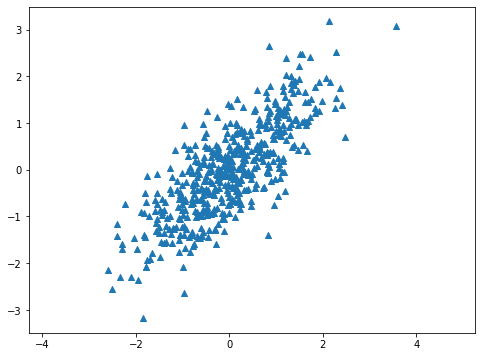

In [5]:
mean = np.array([0, 0])
cov = np.array([[3, 3.2], [3.2, 6]])
np.random.seed(8)
X = np.random.multivariate_normal(mean, cov, size=500)
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

plt.figure(1, figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], marker='^')
plt.axis('equal')
plt.show() 

In [6]:
pca = PCA(n_components=2)
pca.fit(X)

np.set_printoptions(suppress=True, precision=4)
print("mean:\n", pca.mean)
print("ratio:\n", pca.ratio)
print("eigenvalues:\n", pca.eigenvalues)
print("eigenvectors:\n", pca.eigenvectors)

mean:
 [-0.  0.]
ratio:
 [0.8918 0.1082]
eigenvalues:
 [1.7837 0.2163]
eigenvectors:
 [[-0.7071 -0.7071]
 [-0.7071  0.7071]]


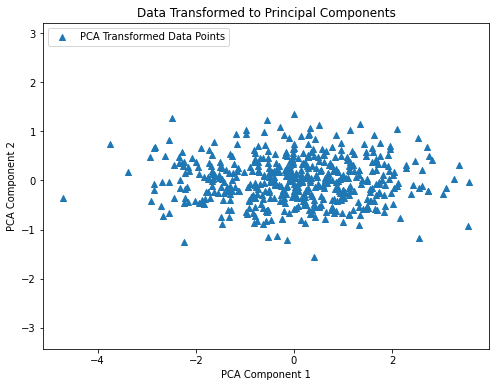

In [7]:
X_pca = pca.transform(X)
plt.figure(1, figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], marker='^', label='PCA Transformed Data Points')
plt.axis('equal')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Data Transformed to Principal Components')
plt.legend(loc='upper left')
plt.savefig("pca_introduction_2.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

In [8]:
data = datasets.load_breast_cancer()
scaler = preprocessing.StandardScaler()
X1 = scaler.fit_transform(data.data) 
y1 = data.target
pca1 = PCA(n_components=2)
pca1.fit(X1)
X_pca1 = pca1.transform(X1)
print("mean:\n", pca1.mean)
print("ratio:\n", pca1.ratio)
print("eigenvalues:\n", pca1.eigenvalues)
print("eigenvectors:\n", pca1.eigenvectors)


mean:
 [-0. -0. -0. -0.  0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0.  0.]
ratio:
 [0.4427 0.1897]
eigenvalues:
 [13.2816  5.6914]
eigenvectors:
 [[ 0.2189  0.1037  0.2275  0.221   0.1426  0.2393  0.2584  0.2609  0.1382
   0.0644  0.206   0.0174  0.2113  0.2029  0.0145  0.1704  0.1536  0.1834
   0.0425  0.1026  0.228   0.1045  0.2366  0.2249  0.128   0.2101  0.2288
   0.2509  0.1229  0.1318]
 [-0.2339 -0.0597 -0.2152 -0.2311  0.1861  0.1519  0.0602 -0.0348  0.1903
   0.3666 -0.1056  0.09   -0.0895 -0.1523  0.2044  0.2327  0.1972  0.1303
   0.1838  0.2801 -0.2199 -0.0455 -0.1999 -0.2194  0.1723  0.1436  0.098
  -0.0083  0.1419  0.2753]]


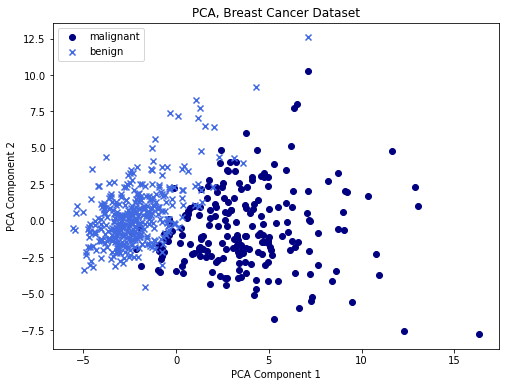

In [9]:
fig = plt.figure(figsize=(8,6))
colors = {0: 'navy', 1: 'royalblue'}
markers = {0:'o', 1: 'x'}
labels = ['malignant', 'benign']
plt.figure(1, figsize=(8,6))
for g in np.unique(y1):
    ix = np.where(y1 == g)
    plt.scatter(X_pca1[ix,0], X_pca1[ix,1], c = colors[g], marker = markers[g], label = labels[g])
# plt.axis('equal')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA, Breast Cancer Dataset')
plt.legend(loc='upper left')
plt.savefig("pca_introduction_2.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()